# Examples of interaction with TranSMART RESTful API

Let's connect to the api.

In [1]:
import getpass
from transmart_api import TransmartApi

api = TransmartApi(host = 'http://localhost:8080', user = 'admin', password = getpass.getpass())

········


The below output has not the best data shape.

In [3]:
observations = api.get_observations(study = 'GSE8581')
observations[0:5]

[{u'label': u'\\Public Studies\\GSE8581\\Biomarker Data\\GPL570\\',
  u'subject': {u'age': 65,
   u'birthDate': None,
   u'deathDate': None,
   u'id': 1000384597,
   u'inTrialId': u'GSE8581GSM210006',
   u'maritalStatus': None,
   u'race': u'Afro American',
   u'religion': None,
   u'sex': u'FEMALE',
   u'trial': u'GSE8581'},
  u'value': None},
 {u'label': u'\\Public Studies\\GSE8581\\Endpoints\\Diagnosis\\',
  u'subject': {u'age': 65,
   u'birthDate': None,
   u'deathDate': None,
   u'id': 1000384597,
   u'inTrialId': u'GSE8581GSM210006',
   u'maritalStatus': None,
   u'race': u'Afro American',
   u'religion': None,
   u'sex': u'FEMALE',
   u'trial': u'GSE8581'},
  u'value': u'non-small cell adenocarcinoma'},
 {u'label': u'\\Public Studies\\GSE8581\\Endpoints\\FEV1\\',
  u'subject': {u'age': 65,
   u'birthDate': None,
   u'deathDate': None,
   u'id': 1000384597,
   u'inTrialId': u'GSE8581GSM210006',
   u'maritalStatus': None,
   u'race': u'Afro American',
   u'religion': None,
   u'se

We would like to use pandas for flatten above json output.

In [4]:
import pandas
from pandas.io.json import json_normalize
df = json_normalize(observations)
df

,label,subject.age,subject.birthDate,subject.deathDate,subject.id,subject.inTrialId,subject.maritalStatus,subject.race,subject.religion,subject.sex,subject.trial,value
0,\Public Studies\GSE8581\Biomarker Data\GPL570\,65,None,None,1000384597,GSE8581GSM210006,None,Afro American,None,FEMALE,GSE8581,None
1,\Public Studies\GSE8581\Endpoints\Diagnosis\,65,None,None,1000384597,GSE8581GSM210006,None,Afro American,None,FEMALE,GSE8581,non-small cell adenocarcinoma
2,\Public Studies\GSE8581\Endpoints\FEV1\,65,None,None,1000384597,GSE8581GSM210006,None,Afro American,None,FEMALE,GSE8581,1.41
3,\Public Studies\GSE8581\Endpoints\Forced Expir...,65,None,None,1000384597,GSE8581GSM210006,None,Afro American,None,FEMALE,GSE8581,51
4,\Public Studies\GSE8581\Subjects\Age\,65,None,None,1000384597,GSE8581GSM210006,None,Afro American,None,FEMALE,GSE8581,65
5,\Public Studies\GSE8581\Subjects\Height (inch)\,65,None,None,1000384597,GSE8581GSM210006,None,Afro American,None,FEMALE,GSE8581,66
6,\Public Studies\GSE8581\Subjects\Lung Disease\,65,None,None,1000384597,GSE8581GSM210006,None,Afro American,None,FEMALE,GSE8581,chronic obstructive pulmonary disease
7,\Public Studies\GSE8581\Subjects\Organism\,65,None,None,1000384597,GSE8581GSM210006,None,Afro American,None,FEMALE,GSE8581,Homo sapiens
8,\Public Studies\GSE8581\Subjects\Race\,65,None,None,1000384597,GSE8581GSM210006,None,Afro American,None,FEMALE,GSE8581,Afro American
9,\Public Studies\GSE8581\Subjects\Sex\,65,None,None,1000384597,GSE8581GSM210006,None,Afro American,None,FEMALE,GSE8581,female


In [5]:
dfp = df.pivot(index = 'subject.inTrialId', columns = 'label', values = 'value')
dfp

label,\Public Studies\GSE8581\Biomarker Data\GPL570\,\Public Studies\GSE8581\Endpoints\Diagnosis\,\Public Studies\GSE8581\Endpoints\FEV1\,\Public Studies\GSE8581\Endpoints\Forced Expiratory Volume Ratio\,\Public Studies\GSE8581\Subjects\Age\,\Public Studies\GSE8581\Subjects\Height (inch)\,\Public Studies\GSE8581\Subjects\Lung Disease\,\Public Studies\GSE8581\Subjects\Organism\,\Public Studies\GSE8581\Subjects\Race\,\Public Studies\GSE8581\Subjects\Sex\
subject.inTrialId,,,,,,,,,,
GSE8581GSM210004,None,non-small cell squamous cell carcinoma,2.54,58,63,72,chronic obstructive pulmonary disease,Homo sapiens,Caucasian,male
GSE8581GSM210005,None,non-small cell adenocarcinoma,1.69,83.66,84,60,control,Homo sapiens,Afro American,female
GSE8581GSM210006,None,non-small cell adenocarcinoma,1.41,51,65,66,chronic obstructive pulmonary disease,Homo sapiens,Afro American,female
GSE8581GSM210007,E,non-small cell adenocarcinoma,2.51,80.96,46,66,not specified,Homo sapiens,Caucasian,male
GSE8581GSM210008,E,non-small cell adenocarcinoma,1.64,57,53,65,chronic obstructive pulmonary disease,Homo sapiens,Caucasian,female
GSE8581GSM210009,E,non-small cell squamous cell carcinoma,2.72,74,53,64,control,Homo sapiens,Caucasian,female
GSE8581GSM210010,E,non-small cell adenocarcinoma,1.45,73,77,63,not specified,Homo sapiens,Caucasian,female
GSE8581GSM210011,E,non-small cell squamous cell carcinoma,1.87,56,56,72,chronic obstructive pulmonary disease,Homo sapiens,Caucasian,male
GSE8581GSM210012,E,non-small cell adenocarcinoma,2.76,70.58,61,69,not specified,Homo sapiens,Caucasian,male


In [6]:
%load_ext rpy2.ipython

'data.frame':	58 obs. of  10 variables:
 $ X.Public.Studies.GSE8581.Biomarker.Data.GPL570.                   : Factor w/ 2 levels "E","None": 2 2 2 1 1 1 1 1 1 1 ...
 $ X.Public.Studies.GSE8581.Endpoints.Diagnosis.                     : Factor w/ 14 levels "carcinoid","emphysema",..: 12 11 11 11 11 12 11 12 11 11 ...
 $ X.Public.Studies.GSE8581.Endpoints.FEV1.                          : Factor w/ 53 levels "0.4","0.52","0.55",..: 40 21 14 39 20 45 16 23 47 25 ...
 $ X.Public.Studies.GSE8581.Endpoints.Forced.Expiratory.Volume.Ratio.: Factor w/ 40 levels "41.0","42.0",..: 13 37 6 32 12 24 23 11 20 28 ...
 $ X.Public.Studies.GSE8581.Subjects.Age.                            : Factor w/ 31 levels "39.0","40.0",..: 14 31 16 3 6 6 26 9 12 21 ...
 $ X.Public.Studies.GSE8581.Subjects.Height..inch..                  : Factor w/ 15 levels "58.0","60.0",..: 13 2 7 7 6 5 4 13 10 4 ...
 $ X.Public.Studies.GSE8581.Subjects.Lung.Disease.                   : Factor w/ 3 levels "chronic obstructive pulm

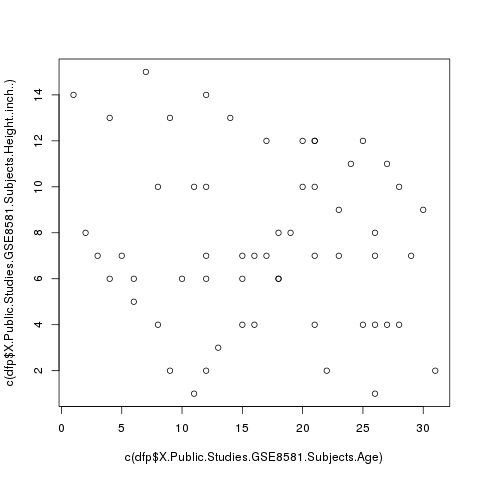

In [7]:
%%R -i dfp

plot(c(dfp$X.Public.Studies.GSE8581.Subjects.Age), c(dfp$X.Public.Studies.GSE8581.Subjects.Height..inch..))

str(dfp)



In [2]:
(hdHeader, hdRows) = api.get_hd_node_data(study = 'GSE8581', node_name = 'Lung')

MemoryError: 

In [ ]:
#1 - double
#2 - string
[(x.name, x.type) for x in hdHeader.columnSpec]

In [ ]:
hdDataDic = {row.label: row.value[1].doubleValue for row in hdRows}

In [ ]:
from pandas import DataFrame
hdDataDic['patientId'] = [assay.patientId for assay in hdHeader.assay]
assayIds = [assay.assayId for assay in hdHeader.assay]
DataFrame(data=hdDataDic, index = assayIds)